Лабораторна робота №8 ФІТ 4-6 Піць А.В
Завдання №1

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


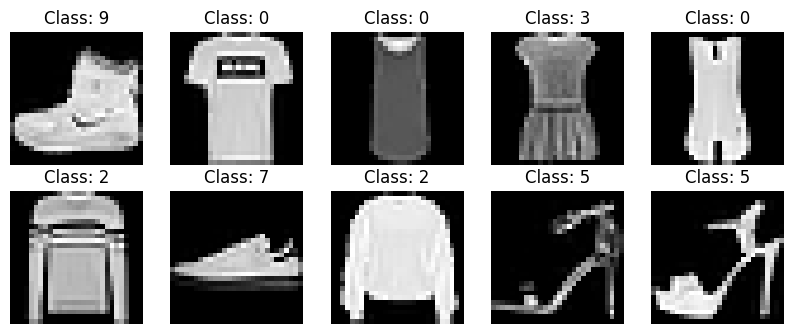

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.7775 - loss: 0.6405 - val_accuracy: 0.8497 - val_loss: 0.4146 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8618 - loss: 0.3745 - val_accuracy: 0.8609 - val_loss: 0.3902 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8762 - loss: 0.3355 - val_accuracy: 0.8701 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8846 - loss: 0.3090 - val_accuracy: 0.8602 - val_loss: 0.3757 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8935 - loss: 0.2887 - val_accuracy: 0.8747 - val_loss: 0.3398 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8984 - loss: 0.2773 - val_accuracy: 0.8782 - val_loss: 0.3471 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9010 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

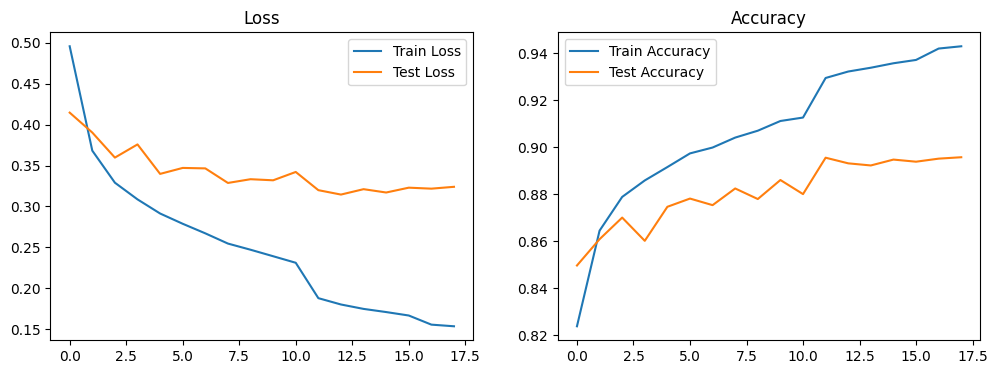

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.80      0.83      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.74      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



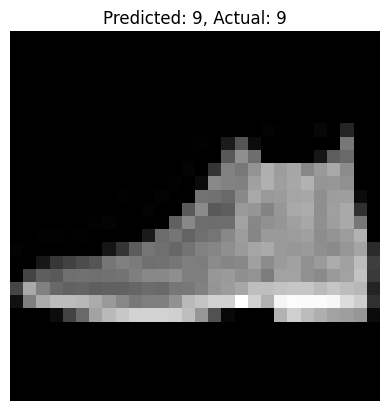

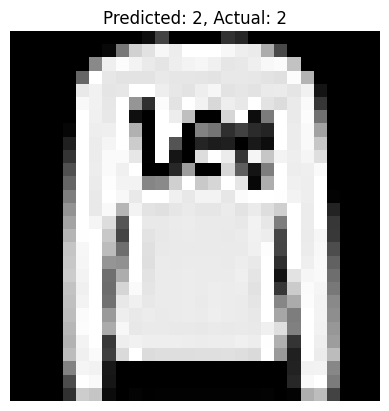

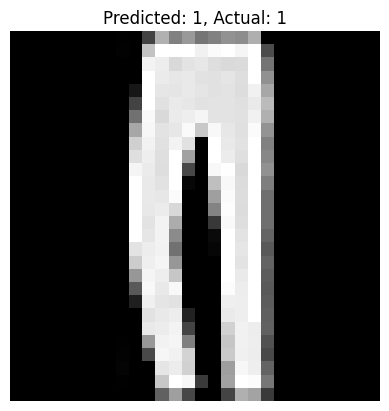

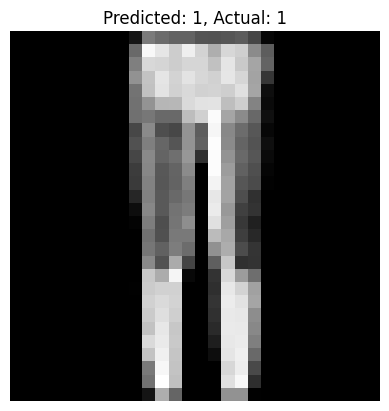

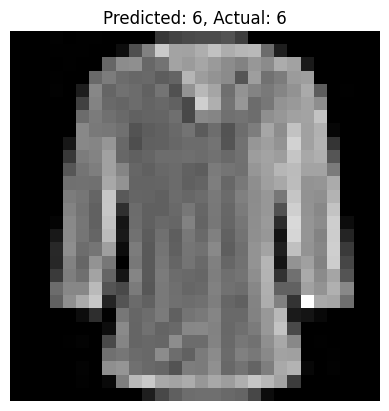

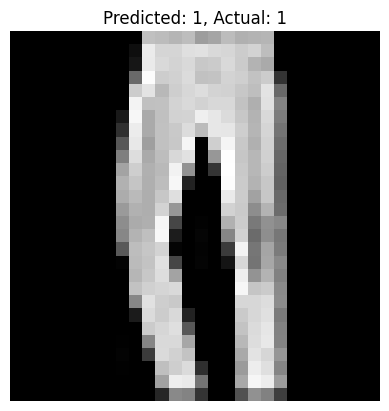

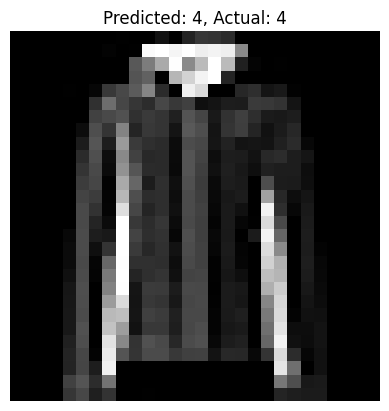

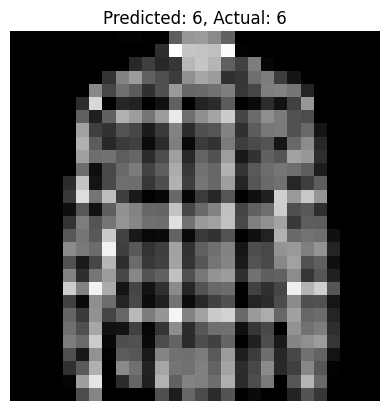

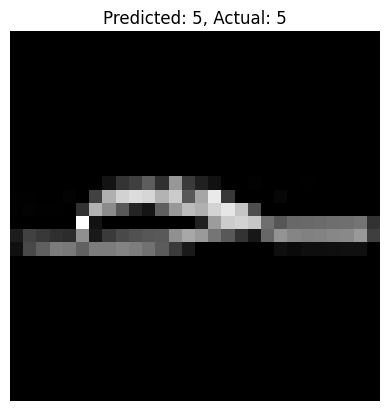

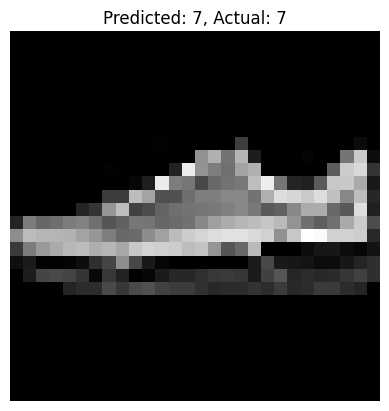

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Виведення 10 зображень
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Class: {y_train[i]}')
    plt.axis('off')
plt.show()

# Побудова архітектури моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Використання ранньої зупинки і зменшення швидкості навчання
early_stop = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Тренування моделі
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, reduce_lr])

# Виведення архітектури моделі
model.summary()

# Збереження моделі на Google Диск
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

# Побудова графіків функції втрат та точності
plt.figure(figsize=(12, 4))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Класифікаційний звіт
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Прогнозовані і справжні класи
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
    plt.axis('off')
    plt.show()


Висновки до першого завдання:
У результаті побудови багатошарової нейронної мережі для класифікації зображень із датасету Fashion MNIST, модель показала достатньо високу точність як на тренувальних, так і на тестових даних. Використання методів ранньої зупинки та зменшення швидкості навчання допомогло уникнути перенавчання та стабілізувати процес тренування. Загалом, побудована архітектура є базовою і показує хороші результати, проте існує можливість покращення моделі за допомогою налаштування гіперпараметрів.

Завдання №2

In [3]:
# Встановлення keras-tuner
!pip install keras-tuner --upgrade

# Імпорт необхідних модулів
from keras_tuner import RandomSearch

# Функція для побудови моделі
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Кількість нейронів у першому шарі
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                           activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Компіляція моделі
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Використання Keras Tuner для пошуку гіперпараметрів
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     executions_per_trial=3,
                     directory='my_dir',
                     project_name='fashion_mnist_tuner')

# Запуск пошуку
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Підсумки пошуку
tuner.results_summary()

# Вибір найкращої моделі та її тренування
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Оцінка та класифікаційний звіт
y_pred_best = np.argmax(best_model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_best))


Trial 5 Complete [00h 04m 30s]
val_accuracy: 0.8835333387056986

Best val_accuracy So Far: 0.8835333387056986
Total elapsed time: 00h 18m 15s
Results summary
Results in my_dir/fashion_mnist_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units: 160
learning_rate: 0.001
Score: 0.8835333387056986

Trial 1 summary
Hyperparameters:
units: 96
learning_rate: 0.001
Score: 0.8822666605313619

Trial 0 summary
Hyperparameters:
units: 32
learning_rate: 0.001
Score: 0.8696999947230021

Trial 2 summary
Hyperparameters:
units: 224
learning_rate: 0.01
Score: 0.8570000131924947

Trial 3 summary
Hyperparameters:
units: 96
learning_rate: 0.01
Score: 0.8547333478927612


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9183 - loss: 0.2220 - val_accuracy: 0.8782 - val_loss: 0.3590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9190 - loss: 0.2199 - val_accuracy: 0.8855 - val_loss: 0.3509
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9213 - loss: 0.2123 - val_accuracy: 0.8832 - val_loss: 0.3452
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9232 - loss: 0.2015 - val_accuracy: 0.8890 - val_loss: 0.3444
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9253 - loss: 0.1978 - val_accuracy: 0.8797 - val_loss: 0.3580
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9283 - loss: 0.1939 - val_accuracy: 0.8913 - val_loss: 0.3330
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9302 - loss: 0.1870 - val_accuracy: 0.8853 - val_loss: 0.3598
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9315 - loss: 0.1832

Висновки до другого завдання:
Використання Keras Tuner дозволило ефективно підібрати оптимальні гіперпараметри для нейронної мережі. Завдяки цьому, вдалося покращити точність моделі та знизити функцію втрат у порівнянні з базовою моделлю з першого завдання. Автоматичний підбір гіперпараметрів дозволив зекономити час та ресурси, надаючи можливість пошуку найкращої конфігурації для цієї задачі класифікації.